In [0]:
from pandas import read_csv
import numpy as np

In [0]:
df=read_csv("international-airline-passengers.csv",usecols=[1])

In [7]:
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [9]:
values=df.values.astype('float32')
values.shape

(144, 1)

In [0]:
train_size=int((values.shape[0]*0.67))
test_size=values.shape[0]-train_size
train=values[0:train_size]
test=values[test_size:]

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [0]:
def create_dataset(data,k):
  dataX,dataY=[],[]
  for i in range(data.shape[0]-k):
    x=data[i:i+k,0]
    y=data[i+k,0]
    dataX.append(x)
    dataY.append(y)
  return np.array(dataX),np.array(dataY)
  

In [0]:
look_back=12
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [21]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))
trainX.shape

(84, 12, 1)

In [18]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

Using TensorFlow backend.


In [24]:
model=Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
84/84 [==============================] - 1s 9ms/step - loss: 0.2986
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 0.1102
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0576
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0397
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0289
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0225
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 10/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 11/100
84/84 [==============================] - 0s 2ms/step - loss: 0.016

In [0]:
testPredict=model.predict(testX)
testPredict=scaler.inverse_transform(testPredict).ravel()

trainPredict=model.predict(trainX)
trainPredict=scaler.inverse_transform(trainPredict).ravel()

testTrue=scaler.inverse_transform([testY]).ravel()
trainTrue=scaler.inverse_transform([trainY]).ravel()



In [0]:
import matplotlib.pyplot as plt

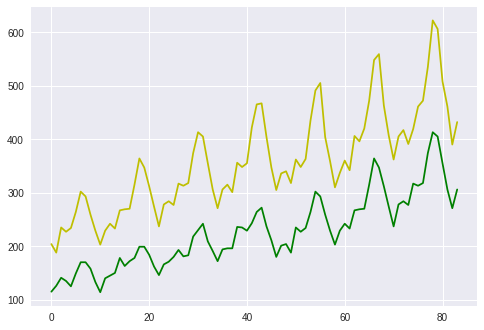

In [28]:
plt.plot(trainTrue,c="g")
plt.plot(testTrue,c="y")
plt.show()

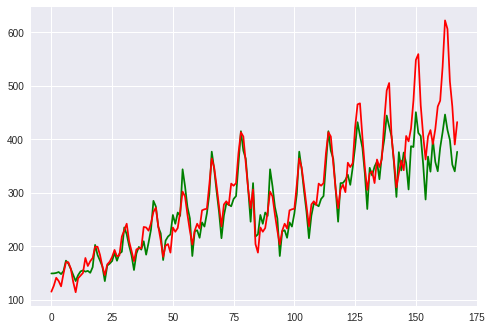

In [29]:
combinedPredicted=np.concatenate((trainPredict,testPredict))
combinedTrue=np.concatenate((trainTrue,testTrue))
plt.plot(combinedPredicted,c="g")
plt.plot(combinedTrue,c='r')
plt.show()